## Q学習

In [1]:
%load_ext lab_black

In [2]:
import os
import sys

sys.path.insert(0, os.path.abspath("../../"))

import numpy as np
from collections import defaultdict
from common.gridworld import GridWorld
from common.utils import greedy_action_probs

#### サンプルモデル版のQ学習

In [3]:
class QLearningAgent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 4
        self.Q = defaultdict(float)

    def get_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            qs = [self.Q[state, a] for a in range(self.action_size)]
            return np.argmax(qs)

    def update(self, state, action, reward, next_state, done):
        if done:
            next_q_max = 0
        else:
            next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
            next_q_max = max(next_qs)

        target = self.gamma * next_q_max + reward
        self.Q[state, action] += (target - self.Q[state, action]) * self.alpha

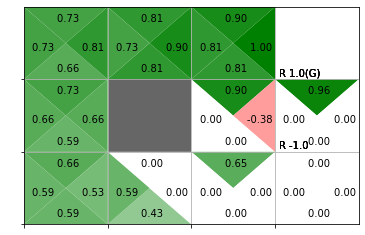

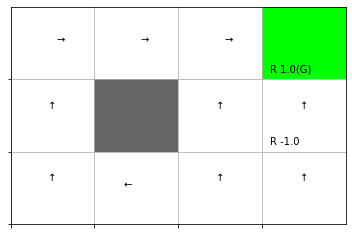

In [4]:
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
for episode in range(episodes):
    state = env.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)

        agent.update(state, action, reward, next_state, done)
        if done:
            break
        state = next_state

env.render_q(agent.Q)